In [1]:
import pandas as pd
import numpy as np
import re

pd.set_option('max.columns', None)

# Import Data

## Import results file

In [2]:
results = pd.read_csv('/Users/mac/Downloads/results.csv', index_col = 0)

results = results[['row', 'plc', 'horseno', 'horse', 'jockey', 'trainer', 'actualwt',
       'declarwt', 'draw', 'lbw', 'runningpos', 'finishtime', 'winodds',
       'date', 'raceno', 'class', 'distance', 'going', 'handicap', 'course',
       'stake', 'venue']]

results.head()

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue
0,0,1,10.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,119.0,1037.0,1.0,-,4 3 1,1.10.19,3.5,2015-06-03,1,5,1200,GOOD TO FIRM,MOUNT BUTLER HANDICAP,TURF - A COURSE,575000,Happy Valley
1,0,1,7.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,125.0,1077.0,11.0,-,9 8 1,1.09.06,2.3,2015-06-07,1,4,1200,GOOD TO FIRM,HKU FOUNDATION HANDICAP,TURF - A+3 COURSE,760000,Sha Tin
2,0,1,3.0,GRAN BOLIVAR(S165),H N Wong,Y S Tsui,121.0,950.0,9.0,-,1 1 1,1.09.64,32.0,2015-06-10,1,4,1200,GOOD TO FIRM,LAI ON HANDICAP,TURF - B COURSE,760000,Happy Valley
3,0,1,11.0,PEOPLE'S KNIGHT(T305),G Mosse,J Moore,120.0,1149.0,4.0,-,4 4 1,1.09.70,6.6,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin
4,0,1,2.0,SIR JOHN(P344),B Prebble,W Y So,131.0,1158.0,10.0,-,1 1 1,0.56.90,6.8,2015-06-17,1,5,1000,GOOD TO FIRM,WANG TAK HANDICAP,TURF - C COURSE,575000,Happy Valley


# CAN ANYONE INVESTIGATE ON THIS?

In [3]:
# results['plc'] = results['plc'].apply(int)
results['plc'].unique()
# results.describe()

array(['1', '1 DH', '2', '2 DH', '3', '3 DH', '4', '4 DH', '5', '5 DH',
       '6', '6 DH', '7', 'WV', '7 DH', '8', '8 DH', '9', 'PU', '9 DH',
       '10', 'UR', 'WV-A', '11', 'FE', 'DNF', '12', 'WX', 'TNP', '13',
       nan, 'WX-A', '14'], dtype=object)

# Convert data into Date, Venue, Course, and Race No. level

In [4]:
text = 'NATURAL EIGHT(S243)'

pattern = re.compile(r'([\w\W]+)?([\(])([A-Z0-9]+)([\)])')

def extract_horse_code(pattern, text):
#     print(text)
    match = re.match(pattern, text)
    return match.group(3)

In [5]:
results['horse_code'] = results['horse'].apply(lambda x: extract_horse_code(pattern, x))
results.head()

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_code
0,0,1,10.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,119.0,1037.0,1.0,-,4 3 1,1.10.19,3.5,2015-06-03,1,5,1200,GOOD TO FIRM,MOUNT BUTLER HANDICAP,TURF - A COURSE,575000,Happy Valley,S243
1,0,1,7.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,125.0,1077.0,11.0,-,9 8 1,1.09.06,2.3,2015-06-07,1,4,1200,GOOD TO FIRM,HKU FOUNDATION HANDICAP,TURF - A+3 COURSE,760000,Sha Tin,T242
2,0,1,3.0,GRAN BOLIVAR(S165),H N Wong,Y S Tsui,121.0,950.0,9.0,-,1 1 1,1.09.64,32.0,2015-06-10,1,4,1200,GOOD TO FIRM,LAI ON HANDICAP,TURF - B COURSE,760000,Happy Valley,S165
3,0,1,11.0,PEOPLE'S KNIGHT(T305),G Mosse,J Moore,120.0,1149.0,4.0,-,4 4 1,1.09.70,6.6,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin,T305
4,0,1,2.0,SIR JOHN(P344),B Prebble,W Y So,131.0,1158.0,10.0,-,1 1 1,0.56.90,6.8,2015-06-17,1,5,1000,GOOD TO FIRM,WANG TAK HANDICAP,TURF - C COURSE,575000,Happy Valley,P344


In [6]:
#results[results['raceno'] == 1].groupby(['course','raceno']).size()

# results[(results['raceno'] == 1) & (results['date'] == '2015-06-03')].groupby(['venue','course']).size()

results.groupby(['date','venue','course','raceno']).size()


results[(results['course'] == 'TURF - A COURSE') & (results['date'] == '2015-06-03') & (results['raceno'] == 2)]

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_code
118,0,1,5.0,ROBUST MOMENTUM(P422),C Y Ho,C Fownes,122.0,1209.0,1.0,-,2 3 2 1,1.40.18,2.5,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P422
1232,1,2,1.0,AXIOM(P095),A Suborics,A Schutz,129.0,1088.0,12.0,1,10 10 9 2,1.40.34,82.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P095
2346,2,3,11.0,LIGHTNING AND GOLD(P354),W M Lai,C H Yip,114.0,1034.0,11.0,1-1/4,11 11 10 3,1.40.38,27.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P354
3460,3,4,7.0,CHINA DELIGHT(N148),T H So,K W Lui,121.0,1031.0,2.0,1-1/4,12 12 12 4,1.40.38,13.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N148
4574,4,5,2.0,AMAZING ALWAYS(N432),D Whyte,D E Ferraris,125.0,1133.0,7.0,1-1/4,8 7 8 5,1.40.40,6.8,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N432
5686,5,6,10.0,RED COURAGE(N110),K Teetan,J Size,117.0,1186.0,5.0,2,3 2 3 6,1.40.50,11.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N110
6797,6,7,12.0,DRAGON GLORY(P130),M Chadwick,C W Chang,113.0,1156.0,3.0,2,4 6 4 7,1.40.51,10.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P130
7900,7,8,3.0,CIRCUIT STAR(N220),K C Leung,K L Man,123.0,1054.0,9.0,2,7 8 7 8,1.40.52,30.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N220
9001,8,9,4.0,MAC ROW(N252),M L Yeung,A Lee,122.0,1001.0,8.0,3-3/4,9 9 11 9,1.40.78,9.9,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N252
10092,9,10,8.0,CONFUCIUS SPIRIT(S329),N Callan,S Woods,120.0,1088.0,4.0,5,6 5 6 10,1.40.98,10.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,S329


In [7]:
results.groupby(['date','venue','course','raceno']).size().to_frame('count_horse').reset_index()

,date,venue,course,raceno,count_horse
0,2015-06-03,Happy Valley,TURF - A COURSE,1,12
1,2015-06-03,Happy Valley,TURF - A COURSE,2,12
2,2015-06-03,Happy Valley,TURF - A COURSE,3,12
3,2015-06-03,Happy Valley,TURF - A COURSE,4,12
4,2015-06-03,Happy Valley,TURF - A COURSE,5,12
...,...,...,...,...,...
1109,2017-07-16,Sha Tin,TURF - C COURSE,7,15
1110,2017-07-16,Sha Tin,TURF - C COURSE,8,8
1111,2017-07-16,Sha Tin,TURF - C COURSE,9,15
1112,2017-07-16,Sha Tin,TURF - C COURSE,10,13


In [8]:
results['trainer'].unique()

array(['C Fownes', 'D J Hall', 'Y S Tsui', 'J Moore', 'W Y So',
       'A Schutz', 'K W Lui', 'P F Yiu', 'T K Ng', 'D Cruz', 'C S Shum',
       'C H Yip', 'K L Man', 'A T Millard', 'C W Chang', 'J Size', 'L Ho',
       "P O'Sullivan", 'D E Ferraris', 'A Lee', 'A S Cruz', 'S Woods',
       'T P Yung', 'R Gibson', "A P O'Brien", 'N Hori', 'M Hawkes',
       'M Sakaguchi', 'A Fabre', 'M Saito', 'J Lau', 'de Royer Dupre',
       'H Fujiwara', 'M Delzangles', 'Y Ikee', 'R Okubo', 'G Enebish',
       'F Rohaut', 'T Tanaka', 'K Lees', 'C Appleby', 'A Bull',
       'G W Moore', 'C Waller', 'Barande-Barbe', 'H Otonashi',
       'S Kunieda', 'P B Shaw', 'W A Ward', 'Y C Fung', 'D A Hayes',
       'M F de Kock', 'K Yoshimura', 'M C Tam', 'K Fujioka', 'J M Moore',
       'Pat Lee', 'Sir M R Stoute', 'M L W Bell', 'E M Lynam',
       'G Portelli', 'R Hannon', 'P Bary', 'T Ozeki', "D O'Meara",
       'W H Tse', 'F Head', "J O'Shea", 'R Fahey', 'K C Chong',
       'D K Weld', 'C Clement', 'E Mader', 

In [9]:
results['jockey'].unique()

array(['C Y Ho', 'B Prebble', 'H N Wong', 'G Mosse', 'J Moreira',
       'A Suborics', 'M L Yeung', 'N Rawiller', 'D Whyte', 'C Schofield',
       'Z Purton', 'K Teetan', 'G Benoist', 'N Callan', 'S de Sousa',
       'R Moore', 'Y T Cheng', 'T H So', 'O Doleuze', 'K K Chiong',
       'K C Leung', 'M Chadwick', 'C Williams', 'S Clipperton',
       'U Rispoli', 'A Sanna', 'W M Lai', 'C K Tong', 'H W Lai',
       'V Cheminaud', 'T Angland', 'O Bosson', 'M Guyon', 'H T Mo',
       'M F Poon', 'K C Ng', 'E da Silva', 'T Berry', 'A Badel', 'D Lane',
       'R Fourie', 'O Murphy', 'H Bowman', 'G Lerena', 'L Salles',
       'M Demuro', 'C Soumillon', 'Y Take', 'G Schofield', 'K Tosaki',
       'C Murray', 'F Geroux', 'D Oliver', 'M Barzalona', 'L Corrales',
       'P Smullen', 'C Brown', 'N Juglall', 'J McDonald', 'Y Iwata',
       'P-C Boudot', 'O Peslier', 'S Pasquier', 'H Lam', 'R Myers',
       'T Clark', 'S Hamanaka', 'M Ebina', 'Y Kawada', 'B Shinn',
       'B Vorster', 'J Rosario', 'W L

In [10]:
df = pd.pivot_table(results,
               index = ['date','venue','course','raceno'],
               columns = ['draw'],
               values = ['horse_code','trainer','jockey'],
               aggfunc = max)

df.reset_index()

date         venue           course raceno horse_code              \
draw                                                          1.0   2.0   3.0   
0     2015-06-03  Happy Valley  TURF - A COURSE      1       S243  L251  N186   
1     2015-06-03  Happy Valley  TURF - A COURSE      2       P422  N148  P130   
2     2015-06-03  Happy Valley  TURF - A COURSE      3       S445  N265  M273   
3     2015-06-03  Happy Valley  TURF - A COURSE      4       T163  S224  P213   
4     2015-06-03  Happy Valley  TURF - A COURSE      5       S137  P016  P371   
...          ...           ...              ...    ...        ...   ...   ...   
1109  2017-07-16       Sha Tin  TURF - C COURSE      7       S332  A096  A120   
1110  2017-07-16       Sha Tin  TURF - C COURSE      8       A066  T198  V397   
1111  2017-07-16       Sha Tin  TURF - C COURSE      9       A352  A139  P363   
1112  2017-07-16       Sha Tin  TURF - C COURSE     10       V118  P396  A337   
1113  2017-07-16       Sha Tin  TURF - C COURSE     11       S298  A098  V186   

                                                                        \
draw   4.0   5.0   6.0   7.0   8.0   9.0  10.0  11.0  12.0  13.0  14.0   
0     P331  P175  P204  S075  M406  M255  N359  S150   NaN   NaN   NaN   
1     S329  N110  N099  N432  N252  N220  P139  P354  P095   NaN   NaN   
2     N055  S086  P308  T072  P088  N134  N317  T133  T328   NaN   NaN   
3     S104  S349  N193  S330  S170  L136  S160  S295  N233   NaN   NaN   
4     P418  T069  S157  S254  P444  P064  N295  M026  S051   NaN   NaN   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1109  S312  V361  T376  T046  V321  T094  V381  A095  A135  A109  V192   
1110  P230  S393  V181  T118  A113   NaN   NaN   NaN   NaN   NaN   NaN   
1111  V040  A286  A164  A248  A168  A249  T117  S362  A232  A163  V176   
1112  V235  A006  V256  A217  A257  V250  S419  V379  A287   NaN   NaN   
1113  T371  S358  V214  V099  T375  V411  V372  A183  T396  T242  A041   

         jockey                                                                \
draw        1.0        2.0         3.0           4.0          5.0         6.0   
0        C Y Ho    H W Lai  A Suborics        T H So      G Mosse    N Callan   
1        C Y Ho     T H So  M Chadwick      N Callan     K Teetan  N Rawiller   
2      K Teetan    G Mosse   K C Leung     O Doleuze       D Lane   M L Yeung   
3      H N Wong    W M Lai   K C Leung     Y T Cheng      G Mosse     D Whyte   
4        C Y Ho     T H So  M Chadwick      N Callan    Y T Cheng     W M Lai   
...         ...        ...         ...           ...          ...         ...   
1109  J Moreira    A Sanna    N Callan      M F Poon    M L Yeung    H N Wong   
1110     K C Ng  M L Yeung   J Moreira      M F Poon      D Whyte    K Teetan   
1111   N Callan   M F Poon     A Sanna      C Murray    U Rispoli   M L Yeung   
1112    A Sanna   C Murray  K K Chiong     U Rispoli  C Schofield    N Callan   
1113   C Murray  U Rispoli   J Moreira  S Clipperton   K K Chiong    K Teetan   

                                                                      \
draw         7.0           8.0         9.0          10.0        11.0   
0     M Chadwick     B Prebble  N Rawiller        D Lane     D Whyte   
1        D Whyte     M L Yeung   K C Leung       H W Lai     W M Lai   
2     N Rawiller       W M Lai   B Prebble        T H So    N Callan   
3      B Prebble      K Teetan      D Lane    A Suborics  M Chadwick   
4        H W Lai       D Whyte  A Suborics     B Prebble  N Rawiller   
...          ...           ...         ...           ...         ...   
1109  K K Chiong       D Whyte   B Prebble  S Clipperton    Z Purton   
1110    C Murray  S Clipperton         NaN           NaN         NaN   
1111   J Moreira      Z Purton     W M Lai    K K Chiong     D Whyte   
1112    H N Wong     J Moreira      K C Ng     B Prebble    Z Purton   
1113     W M Lai   C Schofield     A Sanna       D Whyte      K C Ng   

    

In [11]:
win = pd.pivot_table(results[results['plc'].isin(['1', '1 DH'])],
               index = ['date','venue','course','raceno','plc','horse_code','trainer','jockey'],
               values = ['draw'])

windf = win.reset_index().rename(columns = {'draw':'draw_winner'})

## Extracting horse code from the horse name

## Import horse info file

In [12]:
horse_info = pd.read_csv('/Users/mac/Downloads/horse_info.csv', index_col = 0)

horse_info.head()

,horse,country,trainer,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age
0,()(S259),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(C368),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A BEAUTIFUL(T421),AUS,W Y So,Bay,Gelding,Sandia Yit Lau Ying Lam & Yit Kwok Leung,PP,64.0,58.0,Bushranger,Anfield,6.0
3,A FAST ONE(S424),AUS,D E Ferraris,Bay,Gelding,Samson Yip Yan Tion & David Vrijmoed,PPG,37.0,40.0,Holy Roman Emperor,Detail,6.0
4,A SHIN HIKARI(V614),JPN,NaN,Grey,Horse,Eishindo Co Ltd,VIS,NaN,NaN,Deep Impact,Catalina,NaN


## Extracting horse code from the horse name

In [13]:
horse_info['horse_code'] = horse_info['horse'].apply(lambda x: extract_horse_code(pattern, x))
horse_info.head()

,horse,country,trainer,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age,horse_code
0,()(S259),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S259
1,(C368),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C368
2,A BEAUTIFUL(T421),AUS,W Y So,Bay,Gelding,Sandia Yit Lau Ying Lam & Yit Kwok Leung,PP,64.0,58.0,Bushranger,Anfield,6.0,T421
3,A FAST ONE(S424),AUS,D E Ferraris,Bay,Gelding,Samson Yip Yan Tion & David Vrijmoed,PPG,37.0,40.0,Holy Roman Emperor,Detail,6.0,S424
4,A SHIN HIKARI(V614),JPN,NaN,Grey,Horse,Eishindo Co Ltd,VIS,NaN,NaN,Deep Impact,Catalina,NaN,V614


In [14]:
len(set(horse_info['horse_code']).intersection(set(results['horse_code'])))

1790

In [15]:
len(set(horse_info['horse_code']))

3935

In [16]:
len(set(results['horse_code']))

1807

## Merge result and horse info together using horse code

In [17]:
result_merged = pd.merge(results, horse_info, left_on = 'horse_code', right_on = 'horse_code', suffixes=('', '_2'))

result_merged.head()

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_code,horse_2,country,trainer_2,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age
0,0,1,10.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,119.0,1037.0,1.0,-,4 3 1,1.10.19,3.5,2015-06-03,1,5,1200,GOOD TO FIRM,MOUNT BUTLER HANDICAP,TURF - A COURSE,575000,Happy Valley,S243,NATURAL EIGHT(S243),NZ,NaN,Bay,Gelding,Lionel Chan Man Yan,PPG,NaN,NaN,Testa Rossa,Wolfmother,NaN
1,5,6,5.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,124.0,1059.0,4.0,1-3/4,3 4 6,1.11.29,4.8,2015-09-16,1,5,1200,GOOD,CHEUNG HONG HANDICAP,TURF - B COURSE,600000,Happy Valley,S243,NATURAL EIGHT(S243),NZ,NaN,Bay,Gelding,Lionel Chan Man Yan,PPG,NaN,NaN,Testa Rossa,Wolfmother,NaN
2,5,6,5.0,NATURAL EIGHT(S243),Z Purton,C Fownes,127.0,1036.0,7.0,7,6 5 6,1.10.90,10.0,2015-07-08,2,5,1200,GOOD TO FIRM,THE KING HANDICAP,TURF - A COURSE,575000,Happy Valley,S243,NATURAL EIGHT(S243),NZ,NaN,Bay,Gelding,Lionel Chan Man Yan,PPG,NaN,NaN,Testa Rossa,Wolfmother,NaN
3,8,9,4.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,131.0,1053.0,4.0,5-1/2,7 8 9,1.11.39,10.0,2015-11-14,1,5,1200,GOOD,PANASONIC DRIVING VIDEO RECORDER HANDICAP,TURF - A+3 COURSE,600000,Sha Tin,S243,NATURAL EIGHT(S243),NZ,NaN,Bay,Gelding,Lionel Chan Man Yan,PPG,NaN,NaN,Testa Rossa,Wolfmother,NaN
4,8,9,3.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,129.0,1045.0,1.0,4-1/4,3 4 9,1.11.27,7.1,2016-01-06,1,5,1200,GOOD,PATERSON HANDICAP,TURF - A COURSE,600000,Happy Valley,S243,NATURAL EIGHT(S243),NZ,NaN,Bay,Gelding,Lionel Chan Man Yan,PPG,NaN,NaN,Testa Rossa,Wolfmother,NaN


## Import trackwork file

In [18]:
trackwork = pd.read_csv('/Users/mac/Downloads/trackwork.csv', index_col = 0)

trackwork.head(10)

,horse,horse_code,date,type,track,workouts,gear
0,A BEAUTIFUL,T421,2015-07-20,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
1,A BEAUTIFUL,T421,2015-07-21,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
2,A BEAUTIFUL,T421,2015-07-22,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
3,A BEAUTIFUL,T421,2015-07-23,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
4,A BEAUTIFUL,T421,2015-07-24,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
5,A BEAUTIFUL,T421,2015-07-25,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
6,A BEAUTIFUL,T421,2015-07-26,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
7,A BEAUTIFUL,T421,2015-07-27,Trotting,Sha TinSmT,SmT 1 Round - Fast (R.B.),NaN
8,A BEAUTIFUL,T421,2015-07-28,Trotting,Sha TinSmT,SmT 1 Round - Fast (R.B.),NaN
9,A BEAUTIFUL,T421,2015-07-29,Trotting,Sha TinSmT,SmT 1 Round - Fast (R.B.),NaN


In [19]:
trackwork[trackwork['horse_code'] == 'T421'].head(20)

# results[(results['horse_code'] == 'T421')].head(20)

,horse,horse_code,date,type,track,workouts,gear
0,A BEAUTIFUL,T421,2015-07-20,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
1,A BEAUTIFUL,T421,2015-07-21,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
2,A BEAUTIFUL,T421,2015-07-22,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
3,A BEAUTIFUL,T421,2015-07-23,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
4,A BEAUTIFUL,T421,2015-07-24,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
5,A BEAUTIFUL,T421,2015-07-25,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
6,A BEAUTIFUL,T421,2015-07-26,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
7,A BEAUTIFUL,T421,2015-07-27,Trotting,Sha TinSmT,SmT 1 Round - Fast (R.B.),NaN
8,A BEAUTIFUL,T421,2015-07-28,Trotting,Sha TinSmT,SmT 1 Round - Fast (R.B.),NaN
9,A BEAUTIFUL,T421,2015-07-29,Trotting,Sha TinSmT,SmT 1 Round - Fast (R.B.),NaN


In [20]:
train = trackwork.groupby(['horse_code']).size().to_frame('count_training').reset_index()
train

,horse_code,count_training
0,A001,347
1,A002,672
2,A003,512
3,A004,518
4,A005,464
...,...,...
959,V418,528
960,V420,549
961,V423,437
962,V613,14


## Import barrier file

In [21]:
barrier = pd.read_csv('/Users/mac/Downloads/barrier.csv', index_col = 0)

barrier = barrier[['plc', 'horse', 'jockey', 'trainer', 'draw', 'gear', 'lbw',
       'runningpos', 'time', 'comment', 'date', 'distance', 'going', 'raceno',
       'venue', 'course', 'result']]

barrier.head()

,plc,horse,jockey,trainer,draw,gear,lbw,runningpos,time,comment,date,distance,going,raceno,venue,course,result
0,5,A BEAUTIFUL(T421),B Prebble,W Y So,1.0,NaN,4-3/4L,7 7 5,0.57.93,Ran on ok when asked late.,2015-09-22,1000,GOOD,1,SHA TIN,TURF,Passed
1,3,A BEAUTIFUL(T421),B Prebble,W Y So,6.0,NaN,5-3/4L,5 5 3,1.02.95,Slow to begin; made progress by saving ground ...,2015-10-09,200,GOOD,12,SHA TIN,TURF,Passed
2,10,A BEAUTIFUL(T421),B Prebble,W Y So,10.0,NaN,3-1/4L,8 8 10,1.02.26,Ran on ordinary when asked at 200m.,2015-09-08,200,GOOD,4,SHA TIN,ALL WEATHER TRACK,Failed
3,9,A BEAUTIFUL(T421),H N Wong,W Y So,1.0,H,10-3/4L,5 4 9,1.11.72,Raced along the rail; flattened late.,2015-12-15,1200,GOOD,2,SHA TIN,ALL WEATHER TRACK,NaN
4,3,A BEAUTIFUL(T421),H W Lai,W Y So,4.0,B,2-1/4L,7 4 3,1.02.28,Wide at turn; came home strong for 3rd.,2016-06-03,1050,GOOD,3,SHA TIN,ALL WEATHER TRACK,Passed


In [22]:
barrier.groupby(['date','venue','course','raceno']).size().reset_index()

,date,venue,course,raceno,0
0,2015-06-02,SHA TIN,TURF,1,9
1,2015-06-02,SHA TIN,TURF,2,6
2,2015-06-02,SHA TIN,TURF,3,7
3,2015-06-02,SHA TIN,TURF,4,8
4,2015-06-05,SHA TIN,ALL WEATHER TRACK,1,10
...,...,...,...,...,...
1019,2017-07-07,SHA TIN,ALL WEATHER TRACK,1,7
1020,2017-07-07,SHA TIN,ALL WEATHER TRACK,2,8
1021,2017-07-07,SHA TIN,ALL WEATHER TRACK,3,6
1022,2017-07-11,SHA TIN,ALL WEATHER TRACK,1,9


In [23]:
barrier[(barrier['raceno'] == 1) & (barrier['course'] == 'TURF') & (barrier['date'] == '2015-06-02')]

,plc,horse,jockey,trainer,draw,gear,lbw,runningpos,time,comment,date,distance,going,raceno,venue,course,result
27,2,ABLE FRIEND(P303),J Moreira,J Moore,9.0,CP,SH,8 8 8 2,1.37.74,Taken back early; ran on well without being as...,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
4859,4,LET ME GO(P215),K Teetan,J Moore,8.0,H,1-3/4L,7 7 7 4,1.38.02,Rearward early; responded ok when asked in str...,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
5140,8,LUCKY PLACE(T004),N Rawiller,W Y So,4.0,H,10L,3 3 3 8,1.39.35,On-pace early; weakened in straight.,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
5678,7,MR GINGER(N307),Z Purton,C Fownes,2.0,NaN,7-1/2L,2 2 2 7,1.38.92,In touch early; had a hold in straight.,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
6161,1,PACKING LLAREGYB(S109),M L Yeung,A Schutz,7.0,H/SR,NaN,5 5 5 1,1.37.73,Midfield early; quickened well when cleared in...,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
6520,9,PRINCE FALCON(T144),C W Wong,J Moore,3.0,NaN,NaN,Withdrawn,NaN,NaN,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
6959,3,ROMANTIC TOUCH(S393),B Prebble,T P Yung,6.0,NaN,Head,6 6 6 3,1.37.76,Eased early; dashed well for place.,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
7871,5,SUNNY YING(P152),K C Leung,J Moore,1.0,B,3-1/4L,1 1 1 5,1.38.27,Led early; flattened late.,2015-06-02,1600,GOOD,1,SHA TIN,TURF,Passed
8102,6,SYSTEM OVERLOAD(T115),D Lane,D J Hall,5.0,NaN,3-1/2L,4 4 4 6,1.38.28,Raced midfield under a hold; ran on ok.,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN


In [24]:
barrier[(barrier['raceno'] == 1) & (barrier['horse'] == 'YOUNG RANGER(S435)')]

,plc,horse,jockey,trainer,draw,gear,lbw,runningpos,time,comment,date,distance,going,raceno,venue,course,result
9186,1,YOUNG RANGER(S435),A Badel,C S Shum,7.0,B,NaN,4 1 1 1,1.49.84,Hit the front at 1000m; kept on in the Straigh...,2017-01-21,1700,GOOD,1,HAPPY VALLEY,TURF,NaN
9189,3,YOUNG RANGER(S435),K C Leung,C S Shum,2.0,B,3-1/4L,4 3 3,1.10.91,Up with the pace; not fully tested.,2016-02-05,1200,GOOD,1,SHA TIN,ALL WEATHER TRACK,NaN
9191,7,YOUNG RANGER(S435),K K Chiong,C S Shum,4.0,B,5-3/4L,2 4 7,1.10.83,On-pace early; found nothing when asked.,2016-05-13,1200,GOOD,1,SHA TIN,ALL WEATHER TRACK,Passed
9194,1,YOUNG RANGER(S435),N Rawiller,C S Shum,7.0,B,NaN,1 1 1 1,1.51.54,Led early; kept on well to score.,2017-03-04,1700,GOOD,1,HAPPY VALLEY,TURF,NaN


## Import comment file

In [22]:
comments = pd.read_csv('/Users/mac/Downloads/comments.csv', index_col = 0)

comments = comments[['date','raceno','plc','horseno','gear','comment']]

comments.head(11)

,date,raceno,plc,horseno,gear,comment
0,2015-06-03,1,11,1,B/H,"Ridden along from the middle gate, gained a sp..."
1,2015-06-03,1,4,2,SR/TT,"Settled at the back from the widest gate, save..."
2,2015-06-03,1,7,3,B2/TT,"Settled in last few from a poor draw, widest r..."
3,2015-06-03,1,6,5,--,"Broke well, gradually taken back just off the ..."
4,2015-06-03,1,3,6,--,"Broke well before settling in midfield, switch..."
5,2015-06-03,1,5,7,B/SR,"Settled in rear of midfield on rails, clipped ..."
6,2015-06-03,1,8,8,CP/H/TT,"Began fairly, settled 3-wide in rear of midfie..."
7,2015-06-03,1,9,9,B,Travelled in a prominent position 3-wide witho...
8,2015-06-03,1,1,10,B/H,"Settled just off the pace on rails, soon came ..."
9,2015-06-03,1,10,11,PC/TT,Never seen with a chance. ...


## Perform VaderSentiment Analysis to get score on comment

In [87]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

def sentiment_scores(sentence): 
  
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    
#     print("Overall sentiment dictionary is : ", sentiment_dict) 
#     print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
#     print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
#     print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
#     print("Sentence Overall Rated As", end = " ") 
  
#     if sentiment_dict['compound'] >= 0.05 : 
#         print("Positive") 
  
#     elif sentiment_dict['compound'] <= - 0.05 : 
#         print("Negative") 
  
#     else : 
#         print("Neutral") 
        
    return sentiment_dict['compound']

In [88]:
comments['comment_score'] = comments['comment'].apply(lambda x: sentiment_scores(x))
comments.head()

,date,raceno,plc,horseno,gear,comment,comment_score
0,2015-06-03,1,11,1,B/H,"Ridden along from the middle gate, gained a sp...",-0.2263
1,2015-06-03,1,4,2,SR/TT,"Settled at the back from the widest gate, save...",0.3612
2,2015-06-03,1,7,3,B2/TT,"Settled in last few from a poor draw, widest r...",-0.2960
3,2015-06-03,1,6,5,--,"Broke well, gradually taken back just off the ...",-0.3289
4,2015-06-03,1,3,6,--,"Broke well before settling in midfield, switch...",0.6219


### Distance vs. Type of Horse: class,sex,speed

In [25]:
import matplotlib.pyplot as plt

* Class

In [26]:
class_dis = result_merged.groupby(['class','distance']).size().to_frame('count_distance').reset_index()

Text(0.5, 1.0, 'Class 1 distance distribution')

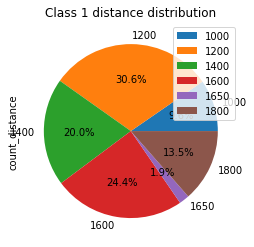

In [27]:
class_dis[class_dis['class']==1].plot.pie(y='count_distance',labels=class_dis[class_dis['class']==1]['distance'],autopct='%1.1f%%')
plt.title('Class 1 distance distribution')

Text(0.5, 1.0, 'Class 2 distance distribution')

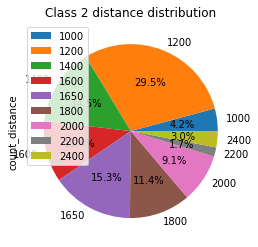

In [28]:
class_dis[class_dis['class']==2].plot.pie(y='count_distance',labels=class_dis[class_dis['class']==2]['distance'],autopct='%1.1f%%')
plt.title('Class 2 distance distribution')

Text(0.5, 1.0, 'Class 3 distance distribution')

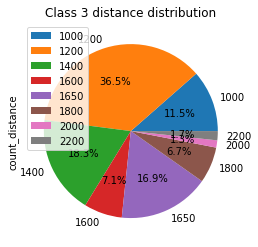

In [29]:
class_dis[class_dis['class']==3].plot.pie(y='count_distance',labels=class_dis[class_dis['class']==3]['distance'],autopct='%1.1f%%')
plt.title('Class 3 distance distribution')

Text(0.5, 1.0, 'Class 4 distance distribution')

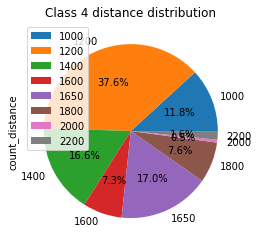

In [30]:
class_dis[class_dis['class']==4].plot.pie(y='count_distance',labels=class_dis[class_dis['class']==4]['distance'],autopct='%1.1f%%')
plt.title('Class 4 distance distribution')

Text(0.5, 1.0, 'Class 5 distance distribution')

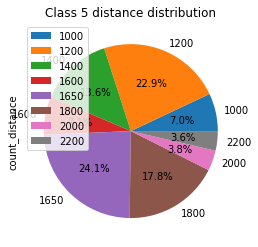

In [31]:
class_dis[class_dis['class']==5].plot.pie(y='count_distance',labels=class_dis[class_dis['class']==5]['distance'],autopct='%1.1f%%')
plt.title('Class 5 distance distribution')

* Sex

In [32]:
result_merged['sex'].unique()

array(['Gelding', 'Brown', 'Horse', 'Rig', 'Mare', 'Colt', 'Roan'],
      dtype=object)

In [33]:
re_sex = result_merged.replace(to_replace =["Colt", "Rig","Horse"],value ="male")
re_sex = re_sex.replace(to_replace =["Mare"],value ="female")
re_sex = re_sex.replace(to_replace =["Brown","Roan"],value ="others")

In [34]:
d = {'Colt':'young', 'Horse':'adult','Rig':'young','Mare':'adult','Brown':'unknown','Roan':'unknown','Gelding':'unknown'}
result_merged['young/adult'] = result_merged['sex'].map(d)

In [35]:
result_merged['sex'].describe()

count       14145
unique          7
top       Gelding
freq        13845
Name: sex, dtype: object

In [36]:
re_sex.groupby(['distance','sex']).size().to_frame('count_distance').reset_index()

,distance,sex,count_distance
0,1000,Gelding,1408
1,1000,female,1
2,1000,others,19
3,1200,Gelding,4718
4,1200,female,7
5,1200,male,22
6,1200,others,50
7,1400,Gelding,2300
8,1400,female,8
9,1400,male,19


Text(0, 0.5, 'count')

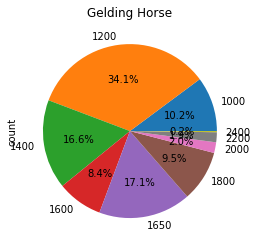

In [37]:
re_sex[re_sex['sex']=='Gelding'].groupby(['distance']).size().plot.pie(y='sex', autopct='%1.1f%%')
plt.title('Gelding Horse')
plt.ylabel('count')

Text(0, 0.5, 'count')

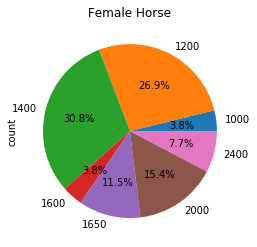

In [38]:
re_sex[re_sex['sex']=='female'].groupby(['distance']).size().plot.pie(y='sex', autopct='%1.1f%%')
plt.title('Female Horse')
plt.ylabel('count')

Text(0, 0.5, 'count')

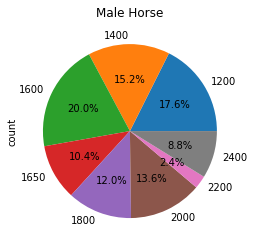

In [39]:
re_sex[re_sex['sex']=='male'].groupby(['distance']).size().plot.pie(y='sex', autopct='%1.1f%%')
plt.title('Male Horse')
plt.ylabel('count')

Text(0, 0.5, 'count')

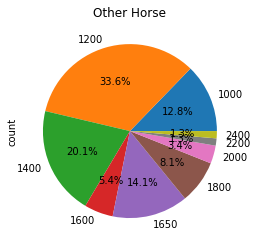

In [40]:
re_sex[re_sex['sex']=='others'].groupby(['distance']).size().plot.pie(y='sex',autopct='%1.1f%%')
plt.title('Other Horse')
plt.ylabel('count')

* Speed

In [41]:
pattern2 = re.compile(r'([0-9]).([0-9]+).([0-9]+)')

def extract_time_length(pattern, text):
    match = re.match(pattern, text)
    if match:
        length = int(match.group(1)) * 60 + int(match.group(2)) + int(match.group(3))/100
    else:
        length = 0
    return length

In [42]:
result_merged['time'] = result_merged['finishtime'].apply(lambda x: extract_time_length(pattern2, x))

In [43]:
result_merged[result_merged['time']==0]['finishtime'].unique()
# one strang datapoint finishtime is 10, dismiss it

array(['---', '10'], dtype=object)

In [44]:
speed_distance = result_merged[result_merged['time'] != 0]
speed_distance['speed'] = speed_distance['distance'] / speed_distance['time']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
speed = speed_distance.groupby(['distance']).mean()['time'].to_frame('mean_time').reset_index()
speed['mean_speed'] = list(speed_distance.groupby(['distance']).mean()['speed'])

In [46]:
speed

,distance,mean_time,mean_speed
0,1000,57.737984,17.324257
1,1200,70.626808,16.994604
2,1400,83.219738,16.826115
3,1600,95.924610,16.682563
4,1650,101.331345,16.287923
5,1800,110.199424,16.339273
6,2000,123.429595,16.206941
7,2200,138.393373,15.901278
8,2400,148.803864,16.130689


### Number of Winning per Horse/Jockey/Trainer

In [48]:
horse_win = windf.groupby(['horse_code']).size().sort_values(ascending=False).to_frame('count_win').reset_index()
horse_win

,horse_code,count_win
0,T242,7
1,T305,6
2,S398,5
3,V082,5
4,N317,5
...,...,...
670,T098,1
671,T100,1
672,T101,1
673,T108,1


In [49]:
jockey_win = windf.groupby(['jockey']).size().sort_values(ascending=False).to_frame('count_win').reset_index()
jockey_game = results.groupby(['jockey']).size().sort_values(ascending=False).to_frame('count_game').reset_index()
jockey = pd.merge(jockey_win, jockey_game, left_on = 'jockey', right_on = 'jockey', suffixes=('', '_2'))

In [51]:
jockey['winrate'] = jockey['count_win']/jockey['count_game']

<BarContainer object of 50 artists>

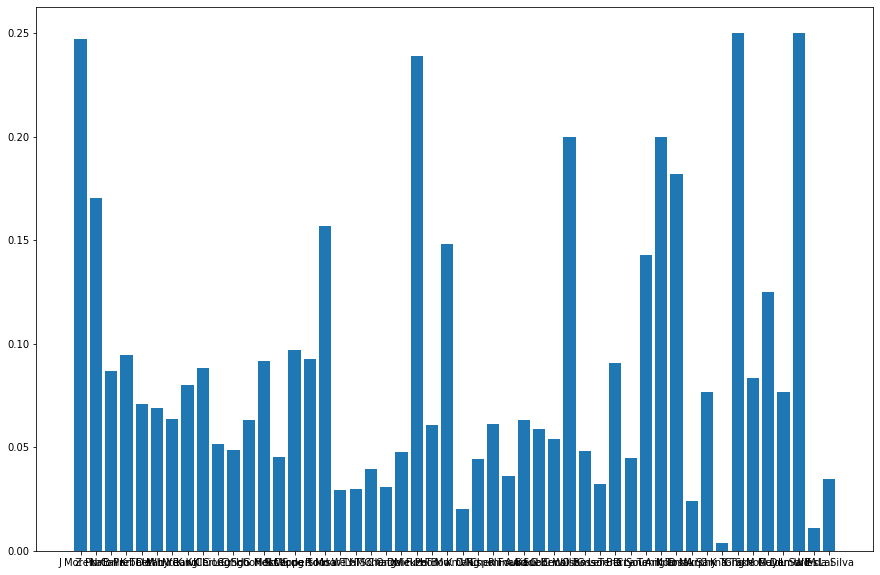

In [62]:
plt.figure(figsize=(15,10))
plt.bar(jockey['jockey'],jockey['winrate'])

In [54]:
jockey

,jockey,count_win,count_game,winrate
0,J Moreira,226,914,0.247265
1,Z Purton,136,799,0.170213
2,N Callan,65,749,0.086782
3,B Prebble,61,645,0.094574
4,K Teetan,58,817,0.070991
5,D Whyte,48,697,0.068867
6,M L Yeung,45,709,0.063470
7,N Rawiller,41,512,0.080078
8,K K Chiong,39,441,0.088435
9,K C Leung,37,720,0.051389


In [56]:
trainer_win = windf.groupby(['trainer']).size().sort_values(ascending=False).to_frame('count_win').reset_index()
trainer_game = results.groupby(['trainer']).size().sort_values(ascending=False).to_frame('count_game').reset_index()
trainer = pd.merge(trainer_win, trainer_game, left_on = 'trainer', right_on = 'trainer', suffixes=('', '_2'))
trainer['winrate'] = trainer['count_win']/trainer['count_game']

<BarContainer object of 28 artists>

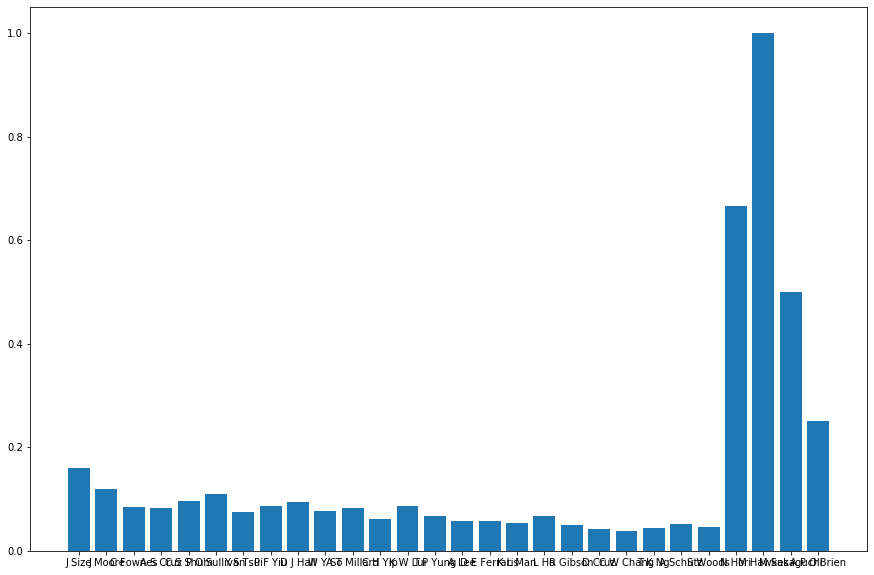

In [61]:
plt.figure(figsize=(15,10))
plt.bar(trainer['trainer'],trainer['winrate'])

In [57]:
trainer

,trainer,count_win,count_game,winrate
0,J Size,114,712,0.160112
1,J Moore,92,770,0.119481
2,C Fownes,69,811,0.085080
3,A S Cruz,66,805,0.081988
4,C S Shum,65,682,0.095308
5,P O'Sullivan,62,566,0.109541
6,Y S Tsui,60,791,0.075853
7,P F Yiu,57,660,0.086364
8,D J Hall,53,557,0.095153
9,W Y So,52,682,0.076246


### Does number of training/trackwork influence the outcome of the game (e.g. more training more winnings)

* trackwork

In [56]:
train_win = pd.merge(train, horse_win, left_on = 'horse_code', right_on = 'horse_code', suffixes=('', '_2'))

In [59]:
train_win['train/win'] = train_win['count_training']/train_win['count_win']

In [63]:
train_win.sort_values(['count_win'],ascending = False)

,horse_code,count_training,count_win,train/win
205,T242,1459,7,208.428571
221,T305,1244,6,207.333333
38,N317,1097,5,219.400000
126,S398,901,5,180.200000
156,T080,912,4,228.000000
...,...,...,...,...
171,T117,734,1,734.000000
175,T140,1416,1,1416.000000
177,T148,1205,1,1205.000000
178,T151,879,1,879.000000


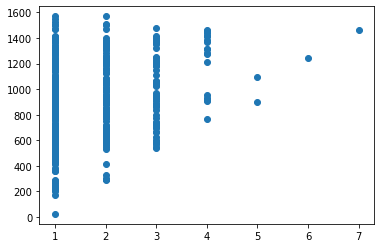

In [66]:
plt.scatter(train_win['count_win'],train_win['count_training'])

Doesn't show obvious relationship bewteen training and winning.

* barrier